<a href="https://colab.research.google.com/github/greennam/MyGit/blob/master/8_3_%EA%B0%80%EC%9A%B0%EC%8A%A4_%ED%98%BC%ED%95%A9%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# K-means algorithms의 약점 : 
#   1. 유연성 부족 (군집 중심 원형 경계 사용)
#   2. 확정적 군집 할당 (비확률적 할당)
# 표준 Package
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


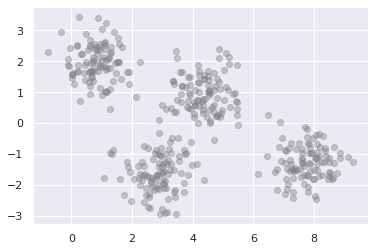

In [6]:
# 정상적인 K-mean cluster analysis example
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples = 400, centers = 4, cluster_std = 0.6, random_state = 0)
X = X[:, ::-1]
plt.scatter(X[:, 0], X[:, 1], c='gray', alpha= 0.4); 
# Data 시인성 높이기 위해 두번째 차원의 데이터 순서를 뒤집어서 시각화함

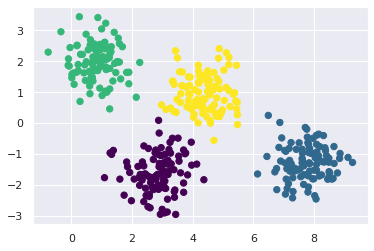

In [14]:
# K-평균 알고리즘 적용
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4, random_state = 0)
clusters = kmeans.fit(X).predict(X)
plt.scatter(X[:, 0], X[:, 1], c= clusters, s=40, cmap = 'viridis')
# plt.scatter(clusters[:, 0], clusters[:, 1], c= 'red'); # error : 'centers' isnt' defined


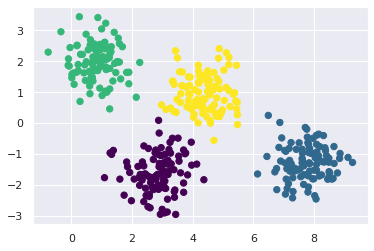

In [17]:
# Gauss mixed model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components = 4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c= clusters, s=40, cmap = 'viridis');

In [18]:
# 확률적 군집 할당 (가우스 혼합 모델 경우)
probs = gmm.predict_proba(X)
print(probs[:5].round(3))

[[0.537 0.463 0.    0.   ]
 [0.    0.    0.    1.   ]
 [0.    0.    0.    1.   ]
 [1.    0.    0.    0.   ]
 [0.    0.    0.    1.   ]]


NameError: ignored

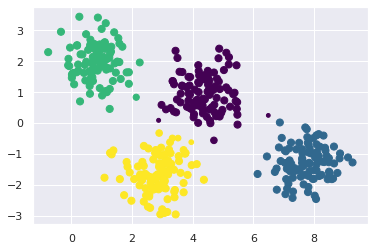

In [19]:
# 군집 할당시 점의 크기를 확률값 크기로 표현
size = 50 * probs.max(1)**2 # 점 크기를 제곱
plt.scatter(X[:, 0], X[:, 1], c= labels, cmap = 'viridis', s=size);
# plt.scatter(centers[:, 0], centers[:, 1], c= 'red');


In [25]:
# 가우스 혼합 모델에서 타원형으로 군집 할당
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components = 4, covariance_type='full', random_state = 42)
# plot_gmm(gmm, X_new)

In [27]:
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

NameError: ignored

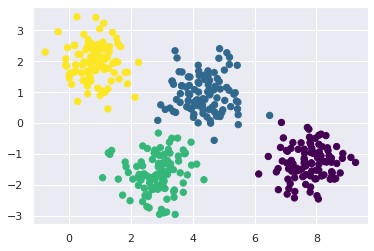

In [29]:
plot_gmm(gmm, X)